0.0019294865756571361
51887.85448566079
31458.44449098838


C:\Users\pheng\AppData\Local\Temp\ipykernel_22508\4123954105.py:88: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  plt.hist(tau_rand,bins,density=True)


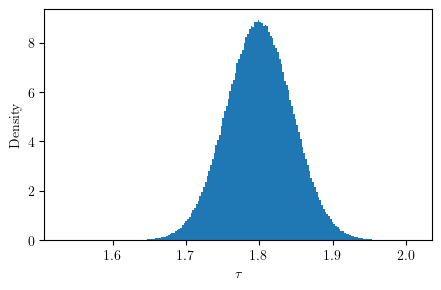

C:\Users\pheng\AppData\Local\Temp\ipykernel_22508\4123954105.py:110: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots()


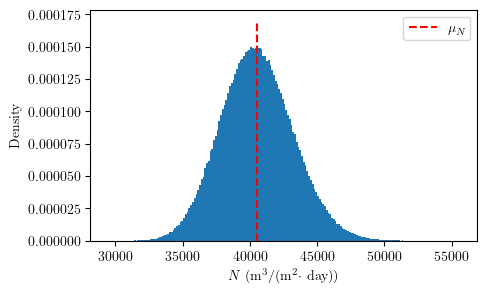

40452.4683496891
0.0004004700000000001


In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Input parameters
T = 343.15 # K
eps = 0.32
tau = 1.8
d_p = 0.30*1e-6 # m
l = 1.0*1e-6 # m
P0 = 500000 # Pa
PL = 125000 # Pa
mu = (420 + (T-340)*(389-420)/5)*1e-6 # Pa-S
rho = 1/1.0225 # kg/m^3

Re = rho*d_p**3*(P0-PL)/(32*mu**2*l)
print(Re)

eps_1 = 1.05*eps
tau_1 = 0.95*tau
d_p_1 = 1.05*d_p
l_1 = 0.95*l

eps_2 = 0.95*eps
tau_2 = 1.05*tau
d_p_2 = 0.95*d_p
l_2 = 1.05*l

del_p = P0 - PL

flux = lambda tau, d_p, eps, l: 24*3600*eps*d_p**2*del_p/(32*mu*tau*l)

fxx_1 = flux(tau_1, d_p_1, eps_1, l_1)
print(fxx_1)

fxx_2 = flux(tau_2, d_p_2, eps_2, l_2)
print(fxx_2)

fxx = flux(tau, d_p, eps, l)


# Uncertainty in data
uncert = 0.05
# Number of samples to simulate
num_samples = 1000000

# Standard deviations
sigma_t = uncert*tau/2
sigma_d = uncert*d_p/2
sigma_e = uncert*eps/2
sigma_l = uncert*l/2

'''
# Generate random data with uniform error
tau_rand = np.random.uniform(tau-sigma_t,tau+sigma_t,num_samples)
d_rand = np.random.uniform(d_p-sigma_d,d_p+sigma_d,num_samples)
e_rand = np.random.uniform(eps-sigma_e,eps+sigma_e,num_samples)
l_rand = np.random.uniform(l-sigma_l,l+sigma_l,num_samples)
'''
# Generate random data with Gaussian error
tau_rand = np.random.normal(tau,sigma_t,num_samples)
d_rand = np.random.normal(d_p,sigma_d,num_samples)
e_rand = np.random.normal(eps,sigma_e,num_samples)
l_rand = np.random.normal(l,sigma_l,num_samples)



fx = flux(tau_rand,d_rand,e_rand,l_rand)

mean_flux = np.mean(fx)

# Number of bins
bins = int(np.ceil(2*np.cbrt(num_samples)))

# Plot histograms of data
font = {'family' : 'serif',
         'size'   : 12,
         'serif':  'cmr10'
         }

plt.rcParams["figure.figsize"] = (5,3)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": "cmr10",
})


plt.hist(tau_rand,bins,density=True)
plt.xlabel('$\\tau$')
plt.ylabel('Density')
plt.show()

'''
plt.hist(d_rand,bins,density=True)
plt.xlabel('$d_p$ ($\mu$m)')
plt.ylabel('Density')
plt.show()

plt.hist(e_rand,bins,density=True)
plt.xlabel('$\\varepsilon$')
plt.ylabel('Density')
plt.show()

plt.hist(l_rand,bins,density=True)
plt.xlabel('$\\ell$ ($\mu$m)')
plt.ylabel('Density')
plt.show()
'''

fig, ax = plt.subplots()

plt.hist(fx,bins,density=True)
plt.plot([mean_flux,mean_flux],[0,0.00017],linestyle='--',color='r',label='$\mu_{N}$')
plt.xlabel('$N$ (m$^3$/(m$^2\cdot$ day))')
plt.ylabel('Density')
plt.legend()
plt.show()

fig.savefig('CHEN_3100_HW_13_1.png',dpi=300,bbox_inches='tight')

print(fxx)
print(mu)

In [75]:
MW_He = 4.002
MW_CO2 = 44.01

P_He = 117000
P_CO2 = 68000

corr = P_He/((MW_CO2/MW_He)**0.5 + 4850*40*1e-8*(317.2/MW_He)**0.5/0.117)

corr_2 = 0.117*P_He/(4850*40*1e-8*(317.2/MW_He)**0.5)

P_pred = P_He*(MW_He/MW_CO2)**0.5

err = 100*(P_CO2-P_pred)/P_CO2

print(P_pred)
print(err)
print(corr)
print(P_pred+corr)
print(corr_2)


35281.63637121547
48.11524063056549
33778.00701938852
69059.64339060399
792577.878021881
